# Some Exercises

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### 1.
*Exercise: Build a DNN with 20 hidden layers of 100 neurons each. Use He initialization and the ELU activation function.*

In [2]:
# TODO

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import cifar10
from keras.utils import np_utils

Using TensorFlow backend.


### Data Input

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [6]:
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')

In [7]:
n_classes = 10

#X_train = X_train.reshape(45000, 1024, 3)
#X_valid = X_valid.reshape(5000, 1024, 3)
#X_test = X_test.reshape(10000, 1024, 3)

Y_train = np_utils.to_categorical(y_train, n_classes)
Y_valid = np_utils.to_categorical(y_valid, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

In [43]:
print(Y_test.shape)

(10000, 10)


### Hyperparameters / Constants

In [44]:
n_units = 100
activ_func = 'elu'
init = 'he_normal'
learning_rate = 0.005
optim = keras.optimizers.Nadam(learning_rate)
nb_epochs = 20
batch_size = 128

In [10]:
X_valid.shape[1:]

(32, 32, 3)

### Model 1 (20 Dense layers, 100 nodes deep - Softmax output)

In [11]:
tf.random.set_seed(13)
np.random.seed(13)

def Model1():
    model = keras.models.Sequential()
    model.add(layers.Flatten(input_shape=X_valid.shape[1:]))
    
    for i in range(20):
        model.add(layers.Dense(n_units, activation=activ_func, kernel_initializer=init))
    
    model.add(layers.Dense(n_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    return model

model = Model1()

### Tensorboard callback

In [12]:
import os
root_logdir = os.path.join(os.curdir, "logs")

In [13]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Hh%Mm_%d-%m")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./logs/run_13h45m_30-06'

In [14]:
from keras import callbacks
tb_cb = callbacks.TensorBoard(run_logdir)

$ tensorboard --logdir=./logs --port=6006

http://localhost:6006

In [15]:
history = model.fit(X_train, Y_train, epochs=nb_epochs,
                    validation_data=(X_valid, Y_valid), callbacks=[tb_cb])

Epoch 1/5
1407/1407 [==============================] - 12s 9ms/step - loss: 2.0814 - accuracy: 0.2433 - val_loss: 2.2056 - val_accuracy: 0.2076
Epoch 2/5
1407/1407 [==============================] - 12s 9ms/step - loss: 1.8525 - accuracy: 0.3269 - val_loss: 1.9307 - val_accuracy: 0.2994
Epoch 3/5
1407/1407 [==============================] - 12s 9ms/step - loss: 1.7828 - accuracy: 0.3543 - val_loss: 1.8117 - val_accuracy: 0.3476
Epoch 4/5
1407/1407 [==============================] - 12s 9ms/step - loss: 1.7284 - accuracy: 0.3787 - val_loss: 1.8126 - val_accuracy: 0.3436
Epoch 5/5
1407/1407 [==============================] - 12s 9ms/step - loss: 1.6949 - accuracy: 0.3944 - val_loss: 1.7460 - val_accuracy: 0.3724


#### Common errors
* ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 1024 but received input with shape [None, 3072]
* ValueError: Shapes (None, 10) and (None, 32, 32, 10) are incompatible # Concerning input reshape
* ValueError: Shapes (None, 10) and (None, 1024, 10) are incompatible   # Concerning input reshape


### 2.
*Exercise: Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with `keras.datasets.cifar10.load_data()`. The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you'll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model's architecture or hyperparameters.*

In [16]:
tf.random.set_seed(13)
np.random.seed(13)

def Model2(learning_rate=0.001, nb_epochs=5):
    model = keras.models.Sequential()
    
    #model.add(layers.Input(shape=X_train.shape[1:]))
    model.add(layers.Flatten(input_shape=X_train.shape[1:]))
    
    for i in range(20):
        model.add(layers.Dense(n_units, activation=activ_func, kernel_initializer=init))
    
    model.add(layers.Dense(n_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    return model

model = Model2()

Some help:

a. Load the dataset

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

b. Fit and validate the model. 
**NOTE: please remember that firstly you need to create your model and compile it with the mentioned architecture and parameters. If you want to go further you can also add some callbacks for earlystopping, checkpoint serialization, tensorboard logging, among many others.**

In [17]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
# create model
grid_model = KerasClassifier(build_fn=Model2, verbose=0)

# grid search epochs, batch size and optimizer
#optim = []
#init = []
nb_epochs = [10, 20, 30]
#batch_size = []
lr = [0.001, 0.005, 0.01]
param_grid = dict(learning_rate=lr, nb_epochs=nb_epochs)

# TODO - GridSearchCV & fit
grid = GridSearchCV(grid_model, param_grid, cv=3)
grid_result = grid.fit(X_train, Y_train, validation_data=(X_valid, Y_valid))#, callbacks=[tb_cb])

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.269156 using {'learning_rate': 0.005, 'nb_epochs': 20}


In [45]:
model.evaluate(X_train, Y_train)

1407/1407 [==============================] - 3s 2ms/step - loss: 2.5476 - accuracy: 0.2235


[2.5475873947143555, 0.22351111471652985]

# Train
history = model.fit(X_train, Y_train, epochs=nb_epochs, 
                    batch_size=batch_size, verbose=1, 
                    validation_data=(X_valid, Y_valid))

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

### 3.
*Exercise: Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?*

In [48]:
n_units = 100
activ_func = 'elu'
init = 'he_normal'
learning_rate = 0.01
optim = keras.optimizers.Nadam(learning_rate)
nb_epochs = 15
batch_size = 128

In [49]:
tf.random.set_seed(13)
np.random.seed(13)

def Model3(learning_rate=learning_rate, epochs=nb_epochs):
    model = keras.models.Sequential()
    
    #model.add(layers.Input(shape=X_train.shape[1:]))
    model.add(layers.Flatten(input_shape=X_train.shape[1:]))
    model.add(layers.BatchNormalization())
    
    for i in range(20):
        model.add(layers.Dense(n_units, activation=activ_func, kernel_initializer=init))
        model.add(layers.BatchNormalization())
    
    model.add(layers.Dense(n_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    return model

model = Model3()

In [50]:
# create model
grid_model = KerasClassifier(build_fn=Model3, verbose=0)

# grid search epochs, batch size and optimizer
#optim = []
#init = []
nb_epochs = [15, 25]
#batch_size = []
lr = [0.005, 0.01]
param_grid = dict(learning_rate=lr, epochs=nb_epochs)

# TODO - GridSearchCV & fit
grid = GridSearchCV(grid_model, param_grid, cv=3)
grid_result = grid.fit(X_train, Y_train, validation_data=(X_valid, Y_valid))#, callbacks=[tb_cb])

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.436378 using {'epochs': 25, 'learning_rate': 0.01}


In [51]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.0865 - accuracy: 0.0918


[3.086491107940674, 0.09179999679327011]

### 4.
*Exercise: Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).*

In [24]:
from sklearn import preprocessing

s_scaler = preprocessing.StandardScaler()
X_train_scaled = s_scaler.fit_transform(X_train.reshape(45000, 3072)).reshape(45000, 1024, 3)
X_valid_scaled = s_scaler.transform(X_valid.reshape(5000, 3072)).reshape(5000, 1024, 3)
X_test_scaled = s_scaler.transform(X_test.reshape(10000, 3072)).reshape(10000, 1024, 3)

In [25]:
X_train_scaled.shape

(45000, 1024, 3)

In [26]:
n_units = 100
activ_func = 'selu'
init = 'lecun_normal'
learning_rate = 0.002
optim = keras.optimizers.Nadam(learning_rate)
nb_epochs = 15
batch_size = 128

In [27]:
tf.random.set_seed(13)
np.random.seed(13)

def Model4(learning_rate=learning_rate, epochs=nb_epochs):
    model = keras.models.Sequential()
    
    #model.add(layers.Input(shape=X_train.shape[1:]))
    model.add(layers.Flatten(input_shape=X_train_scaled.shape[1:]))
    
    for i in range(20):
        model.add(layers.Dense(n_units, activation=activ_func, kernel_initializer=init))
    
    model.add(layers.Dense(n_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    return model

model = Model4()

In [28]:
history = model.fit(X_train_scaled, Y_train,
          batch_size=128, epochs=nb_epochs,
          verbose=1,
          validation_data=(X_valid_scaled, Y_valid), callbacks=[tb_cb])

Epoch 1/15
352/352 [==============================] - 17s 47ms/step - loss: 2.0302 - accuracy: 0.2756 - val_loss: 1.9155 - val_accuracy: 0.3138
Epoch 2/15
352/352 [==============================] - 3s 10ms/step - loss: 1.7865 - accuracy: 0.3650 - val_loss: 1.8294 - val_accuracy: 0.3616
Epoch 3/15
352/352 [==============================] - 3s 10ms/step - loss: 1.6875 - accuracy: 0.4035 - val_loss: 1.7167 - val_accuracy: 0.3880
Epoch 4/15
352/352 [==============================] - 3s 10ms/step - loss: 1.6187 - accuracy: 0.4290 - val_loss: 1.7082 - val_accuracy: 0.3862
Epoch 5/15
352/352 [==============================] - 3s 10ms/step - loss: 1.5533 - accuracy: 0.4563 - val_loss: 1.6473 - val_accuracy: 0.4306
Epoch 6/15
352/352 [==============================] - 3s 10ms/step - loss: 1.5251 - accuracy: 0.4665 - val_loss: 1.6416 - val_accuracy: 0.4324
Epoch 7/15
352/352 [==============================] - 3s 10ms/step - loss: 1.4902 - accuracy: 0.4812 - val_loss: 1.6193 - val_accuracy: 0.439

In [29]:
model.evaluate(X_test_scaled, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5640 - accuracy: 0.4678


[1.5640168190002441, 0.46779999136924744]

### 5.
*Exercise: Try regularizing the model with alpha dropout. Check if there is any improvement or not.*

In [30]:
n_units = 100
activ_func = 'selu'
init = 'lecun_normal'
learning_rate = 0.005
optim = keras.optimizers.Nadam(learning_rate)
nb_epochs = 15
batch_size = 128

In [31]:
X_train_scaled.shape

(45000, 1024, 3)

In [32]:
tf.random.set_seed(13)
np.random.seed(13)

def Model5(learning_rate=learning_rate, epochs=nb_epochs):
    model = keras.models.Sequential()
    
    #model.add(layers.Input(shape=X_train.shape[1:]))
    model.add(layers.Flatten(input_shape=X_train_scaled.shape[1:]))
    
    for i in range(20):
        model.add(layers.Dense(n_units, activation=activ_func, kernel_initializer=init))
    
    model.add(layers.AlphaDropout(rate=0.2))
    model.add(layers.Dense(n_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    return model

model = Model5()

In [33]:
history = model.fit(X_train_scaled, Y_train,
          batch_size=128, epochs=nb_epochs,
          verbose=1,
          validation_data=(X_valid_scaled, Y_valid))

Epoch 1/15
352/352 [==============================] - 3s 10ms/step - loss: 2.2522 - accuracy: 0.1739 - val_loss: 14.6752 - val_accuracy: 0.1304
Epoch 2/15
352/352 [==============================] - 3s 9ms/step - loss: 2.6237 - accuracy: 0.1048 - val_loss: 2.3922 - val_accuracy: 0.1038
Epoch 3/15
352/352 [==============================] - 3s 9ms/step - loss: 2.3238 - accuracy: 0.1001 - val_loss: 2.3740 - val_accuracy: 0.1038
Epoch 4/15
352/352 [==============================] - 3s 9ms/step - loss: 2.3264 - accuracy: 0.0989 - val_loss: 2.3875 - val_accuracy: 0.1010
Epoch 5/15
352/352 [==============================] - 3s 9ms/step - loss: 2.3260 - accuracy: 0.0991 - val_loss: 2.3287 - val_accuracy: 0.1010
Epoch 6/15
352/352 [==============================] - 3s 9ms/step - loss: 2.3257 - accuracy: 0.1007 - val_loss: 2.3957 - val_accuracy: 0.0920
Epoch 7/15
352/352 [==============================] - 3s 9ms/step - loss: 2.3256 - accuracy: 0.0995 - val_loss: 2.3816 - val_accuracy: 0.1038
Epoc

In [34]:
model.evaluate(X_test_scaled, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.4253 - accuracy: 0.1000


[2.425314426422119, 0.10000000149011612]

### 6.
*Exercise: Retrain your model using 1cycle scheduling and see if it improves training speed and model accuracy.*

In [35]:
# TODO

In [36]:
n_units = 100
activ_func = 'selu'
init = 'lecun_normal'
learning_rate = 0.01
optim = keras.optimizers.Nadam(learning_rate)
nb_epochs = 10
batch_size = 128

In [37]:
def Model6(learning_rate=learning_rate, epochs=nb_epochs):
    model = keras.models.Sequential()
    
    #model.add(layers.Input(shape=X_train.shape[1:]))
    model.add(layers.Flatten(input_shape=X_train_scaled.shape[1:]))
    
    for i in range(20):
        model.add(layers.Dense(n_units, activation=activ_func, kernel_initializer=init))
    
    model.add(layers.AlphaDropout(rate=0.2))
    model.add(layers.Dense(n_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    return model

model = Model6()

In [38]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

352/352 [==============================] - 4s 10ms/step - loss: inf - accuracy: 0.1464                    


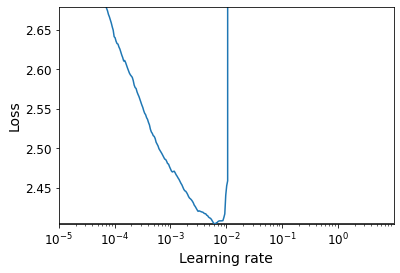

In [39]:
rates, losses = find_learning_rate(model, X_train_scaled, Y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [40]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [41]:
nb_epochs = 20
onecycle = OneCycleScheduler(len(X_train_scaled) // batch_size * nb_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, Y_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, Y_valid),
                    callbacks=[onecycle])

Epoch 1/20
352/352 [==============================] - 4s 10ms/step - loss: 2.1563 - accuracy: 0.2314 - val_loss: 1.9917 - val_accuracy: 0.3062
Epoch 2/20
352/352 [==============================] - 4s 10ms/step - loss: 1.9537 - accuracy: 0.2927 - val_loss: 2.0000 - val_accuracy: 0.3024
Epoch 3/20
352/352 [==============================] - 4s 10ms/step - loss: 1.9125 - accuracy: 0.3110 - val_loss: 1.9313 - val_accuracy: 0.3042
Epoch 4/20
352/352 [==============================] - 4s 10ms/step - loss: 1.8938 - accuracy: 0.3206 - val_loss: 1.9644 - val_accuracy: 0.3036
Epoch 5/20
352/352 [==============================] - 4s 10ms/step - loss: 1.8887 - accuracy: 0.3256 - val_loss: 1.9515 - val_accuracy: 0.3008
Epoch 6/20
352/352 [==============================] - 4s 10ms/step - loss: 1.8950 - accuracy: 0.3216 - val_loss: 2.0607 - val_accuracy: 0.2820
Epoch 7/20
352/352 [==============================] - 4s 10ms/step - loss: 1.8932 - accuracy: 0.3232 - val_loss: 1.9970 - val_accuracy: 0.2890

In [42]:
model.evaluate(X_test_scaled, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.8155 - accuracy: 0.3755


[1.8154945373535156, 0.37549999356269836]